In [ ]:
%cd /content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data

/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data


In [ ]:
root = "/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data"

In [ ]:
#!unzip Project_data.zip

### Import Library

In [ ]:
! pip install -q git+https://github.com/tensorflow/docs
! pip install -q tensorflow-io

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 51.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage import io
import glob
import os,errno
import matplotlib.pyplot as plt
import random
import imageio
from tensorflow_docs.vis import embed
from tensorflow.keras import layers
from datetime import datetime
import tensorflow_io as tfio

### Constant

In [ ]:
IMG_HEIGHT = 100
IMG_WIDTH = 100
IMG_SIZE=(IMG_HEIGHT,IMG_WIDTH)
N_FRAMES= 15
N_CHANNELS = 3
N_CLASSES = 5
BATCH_SIZE = 6
curr_dt_time = datetime.now().date()

### Dataset Pipeline Setup (Generator) :

I have used tensorflow tf.dataset pipeline. The reason to choose this tensorflow data pipeline :



> 1. It is highly optimzed , It's autotune feature automatically the tune pipeline according to underlying hardware. It internally parallelize data fetching process which make fast.
> 2. It's prefetch method made available data immediate after and model training does not sit idle.
> 3. As a developer, it is easy to migrate layers like augmentation process along with training pipeline.
> 4. It also provide to generate data as batch.:
> 5. I have create FrameGenerator class to yield single video frame generator and migration this frameGenerator with tf.pipeline.











##### Reading Given Train & Val Csv Files

In [ ]:
train_pd=pd.read_csv("train.csv",sep=";",header=None)
#labels += 0.05 * tf.random.uniform(labels.shape)

In [ ]:
val_pd=pd.read_csv("val.csv",sep=";",header=None)

In [ ]:
train_pd.columns = ['image_path','label_class','label']

In [ ]:
train_pd.shape

(663, 3)

In [ ]:
train_pd.head(5)

,image_path,label_class,label
0,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left_Swipe_new,0
1,WIN_20180925_17_18_28_Pro_Left_Swipe_new,Left_Swipe_new,0
2,WIN_20180925_17_18_56_Pro_Left_Swipe_new,Left_Swipe_new,0
3,WIN_20180925_17_19_51_Pro_Left_Swipe_new,Left_Swipe_new,0
4,WIN_20180925_17_20_14_Pro_Left_Swipe_new,Left_Swipe_new,0


In [ ]:
val_pd.sample(3)

,0,1,2
40,WIN_20180925_17_33_30_Pro_Thumbs_Down_new,Thumbs_Down_new,3
78,WIN_20180907_16_14_16_Pro_Stop Gesture_new,Stop Gesture_new,2
62,WIN_20180907_15_45_04_Pro_Left Swipe_new_Left ...,Left Swipe_new_Left Swipe_new,0


In [ ]:
val_pd.columns = ['image_path','label_class','label']

##### Finding all Images path from given Directory

In [ ]:
def all_img_seq_path_of(dir_path,n_img_seq=None) :
  """ return all images path from given directory

    Args:
      dir_path : directory path
      n_img_seq : If this value provide , then it will return only n_img_seq which totally random.


    Returns:
      list of image name belong to particular class
  """
  parent_path_of_seq=os.path.join(dir_path,"*")
  seq_image_paths=glob.glob(parent_path_of_seq) # return all images path from given directory
  seq_len = len(seq_image_paths)

  if n_img_seq:
    # generating random seq in between 0 to 30 and using that to get paths.
    ids = random.sample(range(seq_len),n_img_seq)
    seq_image_paths = [seq_image_paths[id] for id in ids]

  return sorted(seq_image_paths)

In [ ]:
# testing all_img_seq_path_of
all_img_seq_path_of(root+"/train"+"/WIN_20180925_17_08_43_Pro_Left_Swipe_new")

['/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/train/WIN_20180925_17_08_43_Pro_Left_Swipe_new/WIN_20180925_17_08_43_Pro_00006.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/train/WIN_20180925_17_08_43_Pro_Left_Swipe_new/WIN_20180925_17_08_43_Pro_00008.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/train/WIN_20180925_17_08_43_Pro_Left_Swipe_new/WIN_20180925_17_08_43_Pro_00010.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/train/WIN_20180925_17_08_43_Pro_Left_Swipe_new/WIN_20180925_17_08_43_Pro_00012.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/train/WIN_20180925_17_08_43_Pro_Left_Swipe_new/WIN_20180925_17_08_43_Pro_00014.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/train/WIN_20180925_17_08_43_Pro_Left_Swipe_new/WIN_20180925_17_08_43_Pr

In [ ]:
# testing with number of given seq
all_img_seq_path_of(root+"/val"+"/WIN_20180907_16_09_35_Pro_Thumbs Down_new",n_img_seq=18)

['/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/val/WIN_20180907_16_09_35_Pro_Thumbs Down_new/WIN_20180907_16_09_35_Pro_00011.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/val/WIN_20180907_16_09_35_Pro_Thumbs Down_new/WIN_20180907_16_09_35_Pro_00012.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/val/WIN_20180907_16_09_35_Pro_Thumbs Down_new/WIN_20180907_16_09_35_Pro_00014.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/val/WIN_20180907_16_09_35_Pro_Thumbs Down_new/WIN_20180907_16_09_35_Pro_00015.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/val/WIN_20180907_16_09_35_Pro_Thumbs Down_new/WIN_20180907_16_09_35_Pro_00016.png',
 '/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/val/WIN_20180907_16_09_35_Pro_Thumbs Down_new/WIN_20180907_16_09_35_Pro_0001

##### Loading Image

In [ ]:
def load_format_img(img_path,img_size=(100,100)):
  img=tf.keras.utils.load_img(
    img_path,
    grayscale=False,
    target_size=img_size,
    interpolation='nearest',
    keep_aspect_ratio=False)
  img = tf.keras.utils.img_to_array(img)
  return img

##### Making Image Frame from Sequence of Images

In [ ]:
# making frame from Seq of images
def img_frames(dir_path,n_frames=None,img_size=IMG_SIZE) :
  seq_img_paths = all_img_seq_path_of(dir_path,n_frames)
  frames = []
  for img_path in seq_img_paths :
    frames.append(load_format_img(img_path,img_size=img_size))

  frames = np.array(frames)[..., [2, 1, 0]]
  return frames

In [ ]:
sample_video = img_frames(root+"/train"+"/WIN_20180925_17_08_43_Pro_Left_Swipe_new", n_frames = N_FRAMES)
sample_video.shape

(15, 100, 100, 3)

In [ ]:
def to_gif(images,fps):
  converted_images = images.astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, fps=fps)
  return embed.embed_file('./animation.gif')


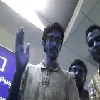

In [ ]:
to_gif(sample_video,N_FRAMES)

##### Frame Generator

In [ ]:
# write frame generator
class FrameGenerator :
  def __init__(self,dir_paths,labels,n_frames,training=False):
    self.dir_paths = dir_paths
    self.labels=labels
    self.n_frames=n_frames
    self.training=training

  def __call__(self):

    pairs = list(zip(self.dir_paths, self.labels))
    if self.training:
      random.shuffle(pairs)

    # generating frame one by one, I am going to batch later in tf.data
    for path, label in pairs:
      frame = img_frames(path, self.n_frames)
      yield frame, label

In [ ]:
# train & val dir paths and labels
train_dir_paths=train_pd.image_path.to_list()
train_dir_paths= [root+"/train"+"/"+path for path in train_dir_paths] # absolute path
train_lables = train_pd.label.to_list()

val_dir_paths=val_pd.image_path.to_list()
val_dir_paths= [root+"/val"+"/"+path for path in val_dir_paths] # absolute path
val_lables = val_pd.label.to_list()

print("train dir paths length => ",len(train_dir_paths))
print("train labels length =>",len(train_lables))
print("val dir paths length => ",len(val_dir_paths))
print("val labels length =>",len(val_lables))

train dir paths length =>  663
train labels length => 663
val dir paths length =>  100
val labels length => 100


In [ ]:
# testing FrameGenerator
fg = FrameGenerator(train_dir_paths,train_lables,n_frames=8,training=True)

frames, label = next(fg())

print(f"Shape: {frames.shape}")
print(f"Label: {label}")

Shape: (8, 100, 100, 3)
Label: 4


##### tf.dataset train and test pipeline

**Finally, create a TensorFlow data input pipeline. This pipeline that created from the frameGenerator object allows us to feed in data to the deep learning model. In this video pipeline, each element is a single set of frames and its associated label.**




In [ ]:
# Creating data set with tf.data.Dataset
output_signature = (tf.TensorSpec(shape = (None, None, None, 3), dtype = tf.float32),
                    tf.TensorSpec(shape = (), dtype = tf.int16))
train_ds = tf.data.Dataset.from_generator(
    FrameGenerator(train_dir_paths,train_lables,n_frames=N_FRAMES,training=True),
    output_signature = output_signature)

In [ ]:
# validation set
val_ds = tf.data.Dataset.from_generator(
    FrameGenerator(val_dir_paths,val_lables,n_frames=N_FRAMES,training=True),
    output_signature = output_signature)

In [ ]:
#Check to see that the labels are shuffled.
for frames, labels in train_ds.take(10):
  print(labels)

tf.Tensor(3, shape=(), dtype=int16)
tf.Tensor(4, shape=(), dtype=int16)
tf.Tensor(4, shape=(), dtype=int16)
tf.Tensor(1, shape=(), dtype=int16)
tf.Tensor(4, shape=(), dtype=int16)
tf.Tensor(4, shape=(), dtype=int16)
tf.Tensor(3, shape=(), dtype=int16)
tf.Tensor(3, shape=(), dtype=int16)
tf.Tensor(0, shape=(), dtype=int16)
tf.Tensor(1, shape=(), dtype=int16)


In [ ]:
#Print the shapes of the data
train_frames, train_labels = next(iter(train_ds))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels.shape}')

val_frames, val_labels = next(iter(val_ds))
print(f'Shape of validation set of frames: {val_frames.shape}')
print(f'Shape of validation labels: {val_labels.shape}')

Shape of training set of frames: (15, 100, 100, 3)
Shape of training labels: ()
Shape of validation set of frames: (15, 100, 100, 3)
Shape of validation labels: ()


Configure the dataset for performance :

Use buffered prefetching such that you can yield data from the disk without having I/O become blocking. Two important functions to use while loading data are:

Dataset.cache: keeps the sets of frames in memory after they're loaded off the disk during the first epoch. This function ensures that the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

Dataset.prefetch: overlaps data preprocessing and model execution while training. Refer to Better performance with the tf.data for details.




In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
# batch data
batched_train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE).batch(BATCH_SIZE)
batched_val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE).batch(BATCH_SIZE)

### Models

#### Common Function

In [ ]:
# common methods are being used

# Tthis will be used to tuning of learning rate

# callback to append loss
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
def learning_rate_tuning(mdl,tr_ds,vr_ds,hyper_lr=[0.1, 0.01, 0.001,0.0001]) :
  plot_data = {}
  # for each hyperparam: train the model and plot loss history
  for lr in hyper_lr:
      history = LossHistory()
      print ('\n\n'+'=='*20 + '   Checking for LR={}  '.format(lr) + '=='*20 )
      loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

      #sgd = tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9,weight_decay=1e-6,nesterov=True)
      optimizer = tf.keras.optimizers.Adam(lr)

      # model and generators
      modl = mdl()

      epochs=10
      modl.compile(
      optimizer=optimizer,
      loss=loss_object,
      metrics=["accuracy"]
      )

      modl.fit(
      tr_ds,
      epochs=epochs,
      callbacks=[history],
      validation_data=vr_ds,
      )

      # store loss history
      plot_data[lr] = history.losses
  return plot_data

def plot_learning_with_loss(plot_data) :
  # plot loss history for each value of hyperparameter
  f, axes = plt.subplots(1, 6, sharey=True)
  f.set_figwidth(15)

  plt.setp(axes, xticks=np.arange(0, len(plot_data[0.01]), 1)+1)

  for i, lr in enumerate(plot_data.keys()):
    axes[i].plot(np.arange(len(plot_data[lr]))+1, plot_data[lr])

In [ ]:
# pre run setup like creating direcotry
def pre_run_setup(exp_model_alias) :
  model_path = f"{exp_model_alias}/{str(curr_dt_time).replace(' ','').replace(':','_')}/"

  #create dir
  try:
    os.makedirs(model_path)
  except OSError as e:
    if e.errno != errno.EEXIST:
        raise

  return model_path+'model-{epoch:05d}-{loss:.5f}-{accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.ckpt'

In [ ]:
# plot model
def plotModelHistory(h):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(h.history['loss'])
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['loss','val_loss'])
    ax[0].title.set_text("Train loss vs Validation loss")

    ax[1].plot(h.history['accuracy'])
    ax[1].plot(h.history['val_accuracy'])
    ax[1].legend(['categorical_accuracy','val_categorical_accuracy'])
    ax[1].title.set_text("Train accuracy vs Validation accuracy")
    plt.show()

    print("Max. Training Accuracy", max(h.history['accuracy']))
    print("Max. Validaiton Accuracy", max(h.history['val_accuracy']))


I followed below steps during each modeling process

1.   First, I defined model architecture.
2.   Then, testing network with small data set
3.  Finding optimal learning rate with small dataset.
4.  Then final run and experiment.
5.  Ending with conclusion



#### Exp1- Simple CNN Network With RNN

##### Model Network

In [ ]:
# custom layer which is resposible to create Conv2D,BatchNormalization,Activation together.
class Conv2D_BN_Activation(tf.keras.layers.Layer):
  def __init__(self, n_filters, kernel_size,stride=1):
    super().__init__()
    self.conv2D = layers.Conv2D(n_filters,kernel_size,stride, padding='same')
    self.bn = layers.BatchNormalization()
    self.activation = layers.Activation("relu")

  def call(self, x):
    x = self.conv2D(x)
    x = self.bn(x)
    x = self.activation(x)

    return x

In [ ]:
# simple conv net + RNN
def make_conv2d_with_simple_model(input_shape, n_classes,n_filters=[64,128,256,512],stride=1):

        inputs = tf.keras.Input(shape=input_shape)

        x=layers.TimeDistributed(layers.Rescaling(1.0 / 255))(inputs)

        x=layers.TimeDistributed(Conv2D_BN_Activation(64,3))(x)
        x=layers.TimeDistributed(layers.MaxPooling2D(2))(x)

        x=layers.TimeDistributed(Conv2D_BN_Activation(128,3))(x)
        x=layers.TimeDistributed(layers.MaxPooling2D(2))(x)

        x=layers.TimeDistributed(Conv2D_BN_Activation(256,3))(x)
        x=layers.TimeDistributed(layers.MaxPooling2D(2))(x)

        x=layers.TimeDistributed(Conv2D_BN_Activation(512,3))(x)
        x=layers.TimeDistributed(layers.MaxPooling2D(2))(x)

        x=layers.TimeDistributed(layers.GlobalAveragePooling2D())(x)

        x=layers.LSTM(64)(x)
        #x=layers.Dropout(0.3)(x)
        outputs=layers.Dense(n_classes)(x)

        return tf.keras.Model(inputs, outputs)

class SimpleConv2dNet :
  def __init__(self,img_shape= IMG_SIZE+ (N_CHANNELS,),n_frames=N_FRAMES,n_classes=N_CLASSES) :
    self.input_shape = (n_frames,) + img_shape
    self.n_classes = n_classes

  def __call__(self) :
    return make_conv2d_with_simple_model(input_shape= self.input_shape,
                                   n_classes=self.n_classes)

In [ ]:
simpleConv2d_net = SimpleConv2dNet()()
simpleConv2d_net.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 15, 100, 100, 3)  0         
                             ]                                   
                                                                 
 time_distributed_231 (TimeD  (None, 15, 100, 100, 3)  0         
 istributed)                                                     
                                                                 
 time_distributed_232 (TimeD  (None, 15, 100, 100, 64)  2048     
 istributed)                                                     
                                                                 
 time_distributed_233 (TimeD  (None, 15, 50, 50, 64)   0         
 istributed)                                                     
                                                                 
 time_distributed_234 (TimeD  (None, 15, 50, 50, 128)  743

##### ablation run

In [ ]:
# batch data set
# taken small for testing of network functionalily running good
tr_ds = batched_train_ds.take(5)
vl_ds = batched_val_ds.take(5)

In [ ]:
train_frames, train_labels = next(iter(tr_ds))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels.shape}')

val_frames, val_labels = next(iter(vl_ds))
print(f'Shape of validation set of frames: {val_frames.shape}')
print(f'Shape of validation labels: {val_labels.shape}')

Shape of training set of frames: (6, 15, 100, 100, 3)
Shape of training labels: (6,)
Shape of validation set of frames: (6, 15, 100, 100, 3)
Shape of validation labels: (6,)


In [ ]:
simpleConv2d_net = SimpleConv2dNet()()
simpleConv2d_net.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

simpleConv2d_net.fit(tr_ds,
          epochs = 10,
          validation_data = vl_ds,
          callbacks = tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'))

Epoch 1/10
5/5 [==============================] - 24s 554ms/step - loss: 2.1518 - accuracy: 0.2667 - val_loss: 2.2699 - val_accuracy: 0.1333
Epoch 2/10
5/5 [==============================] - 1s 198ms/step - loss: 1.5474 - accuracy: 0.3000 - val_loss: 1.9423 - val_accuracy: 0.2333
Epoch 3/10
5/5 [==============================] - 1s 200ms/step - loss: 1.5125 - accuracy: 0.3667 - val_loss: 2.0975 - val_accuracy: 0.2000
Epoch 4/10
5/5 [==============================] - 1s 198ms/step - loss: 1.4074 - accuracy: 0.3333 - val_loss: 1.6948 - val_accuracy: 0.2667
Epoch 5/10
5/5 [==============================] - 1s 199ms/step - loss: 1.2973 - accuracy: 0.4000 - val_loss: 1.7253 - val_accuracy: 0.1667
Epoch 6/10
5/5 [==============================] - 1s 217ms/step - loss: 1.2718 - accuracy: 0.4000 - val_loss: 1.3734 - val_accuracy: 0.4667
Epoch 7/10
5/5 [==============================] - 1s 215ms/step - loss: 1.2846 - accuracy: 0.3667 - val_loss: 1.5039 - val_accuracy: 0.4000
Epoch 8/10
5/5 [===

##### Learning Rate Tuning

In [ ]:
simpleConv2d_net = SimpleConv2dNet()
plot_data = learning_rate_tuning(simpleConv2d_net,tr_ds,vl_ds,hyper_lr=[0.1, 0.01, 0.001,0.0001,0.00001,1e-6])



========================================   Checking for LR=0.1  ========================================
Epoch 1/10
5/5 [==============================] - 8s 419ms/step - loss: 2.1927 - accuracy: 0.3000 - val_loss: 1.7437 - val_accuracy: 0.2333
Epoch 2/10
5/5 [==============================] - 1s 179ms/step - loss: 1.8584 - accuracy: 0.2000 - val_loss: 2.1046 - val_accuracy: 0.1667
Epoch 3/10
5/5 [==============================] - 1s 179ms/step - loss: 2.2123 - accuracy: 0.1667 - val_loss: 1.7467 - val_accuracy: 0.2333
Epoch 4/10
5/5 [==============================] - 1s 203ms/step - loss: 2.3049 - accuracy: 0.1000 - val_loss: 1.6002 - val_accuracy: 0.3000
Epoch 5/10
5/5 [==============================] - 1s 204ms/step - loss: 2.0932 - accuracy: 0.2000 - val_loss: 1.6956 - val_accuracy: 0.2333
Epoch 6/10
5/5 [==============================] - 1s 185ms/step - loss: 2.1637 - accuracy: 0.1000 - val_loss: 2.1615 - val_accuracy: 0.1000
Epoch 7/10
5/5 [==============================] - 1s 

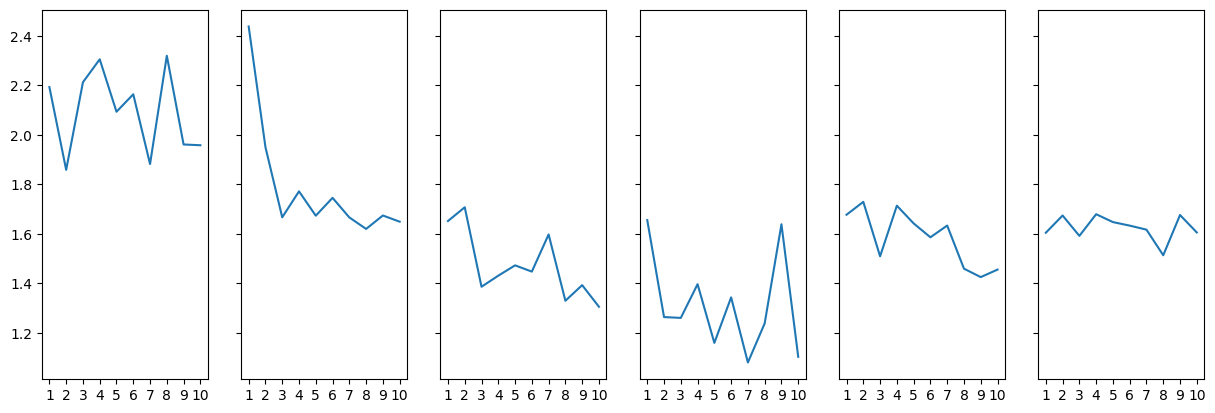

In [ ]:
plot_learning_with_loss(plot_data)

**Optimal Learning rate is 0.0001 also there is zigzag pattern visible of the same learning rate which means learning rate need to reduce as model reaching at minima. So it also hint to use learning rate decay as epoch passes.**

In [ ]:
lr = 0.0001

In [ ]:
exp_model_name = []

##### Final Run

In [ ]:
model_grp_name = "SimpleCnn_Plus_Rnn_with_15Frame"

In [ ]:
model_path = pre_run_setup(model_grp_name)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy',
                             verbose=1, save_best_only=True, save_weights_only=True, mode='max')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.0000001,cooldown=20)
callbacks_list = [checkpoint, reduce_lr]
# tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss')

In [ ]:
simpleConv2d_net = SimpleConv2dNet()()
simpleConv2d_net.compile(optimizer  = tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
simpleConv2d_hist=simpleConv2d_net.fit(batched_train_ds,
          epochs = 30,
          validation_data = batched_val_ds,
          callbacks = callbacks_list)

Epoch 1/30
    111/Unknown - 21s 120ms/step - loss: 1.2616 - accuracy: 0.4434
Epoch 1: val_accuracy improved from -inf to 0.21000, saving model to SimpleCnn_Plus_Rnn_with_15Frame/2023-04-09/model-00001-1.26159-0.44344-2.01331-0.21000.ckpt
111/111 [==============================] - 24s 146ms/step - loss: 1.2616 - accuracy: 0.4434 - val_loss: 2.0133 - val_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 2/30
111/111 [==============================] - ETA: 0s - loss: 1.0056 - accuracy: 0.6094
Epoch 2: val_accuracy did not improve from 0.21000
111/111 [==============================] - 14s 127ms/step - loss: 1.0056 - accuracy: 0.6094 - val_loss: 2.2613 - val_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 3/30
111/111 [==============================] - ETA: 0s - loss: 0.8051 - accuracy: 0.6802
Epoch 3: val_accuracy did not improve from 0.21000
111/111 [==============================] - 14s 128ms/step - loss: 0.8051 - accuracy: 0.6802 - val_loss: 2.5179 - val_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 4/30
111

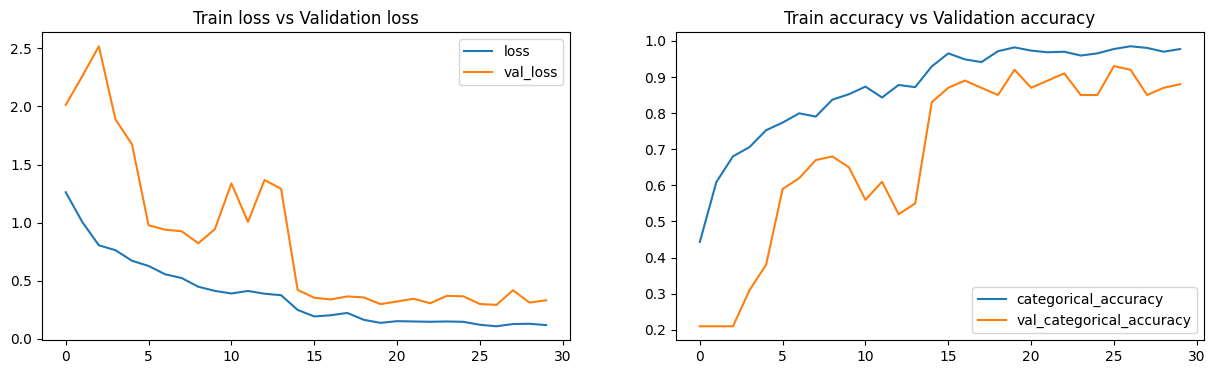

Max. Training Accuracy 0.9849170446395874
Max. Validaiton Accuracy 0.9300000071525574


In [ ]:
plotModelHistory(simpleConv2d_hist)

##### Conclusion :



*   Initally model is getting Overfit, but after 15 epoch traning , validation accuracy also getting increase.
*  Some zig-zag pattern also visible after 15 epoch training. But validation accuracy and training accuracy are more or less close to each other.



#### Exp2 : Transfer Learning ResNetCNN + Rnn *Model*

##### Model Network

In [ ]:
def make_resnet_model(fine_tune_at=-8) :

  res_net = tf.keras.applications.ResNet50V2(include_top=False,weights='imagenet')

  for layer in res_net.layers[:fine_tune_at]: layer.trainable = False
  for layer in res_net.layers[fine_tune_at:]: layer.trainable = True

  return res_net

In [ ]:
# make rnn model
def make_rnn_model(cnn_model,img_shape,n_frames,n_classes) :

  cnn_net=cnn_model()

  model = tf.keras.Sequential([
    layers.Rescaling(1.0 / 255),
    layers.TimeDistributed(cnn_net),
    layers.TimeDistributed(layers.GlobalAveragePooling2D()),
    layers.LSTM(64),
    layers.Dense(n_classes)
  ])

  model.build((None,)+(n_frames,)+img_shape)
  return model

In [ ]:
class ResPlusRnnNet :
  def __init__(self,img_shape= IMG_SIZE+ (N_CHANNELS,),n_frames=N_FRAMES,n_classes=N_CLASSES) :
    self.img_shape = img_shape
    self.n_frames = n_frames
    self.n_classes = n_classes

  def __call__(self) :
    return make_rnn_model(make_resnet_model,
                          img_shape= self.img_shape,
                          n_frames=self.n_frames,
                          n_classes=self.n_classes)

In [ ]:
model = ResPlusRnnNet(img_shape= IMG_SIZE+ (N_CHANNELS,),n_frames=N_FRAMES,n_classes=N_CLASSES)()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 15, 100, 100, 3)   0         
                                                                 
 time_distributed_6 (TimeDis  (None, 15, 4, 4, 2048)   23564800  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 15, 2048)         0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 64)                540928    
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 24,106,053
Trainable params: 3,956,293
N

##### ablation run

In [ ]:
# batch data set
# taken small for testing of network functionalily running good
tr_ds = batched_train_ds.take(5)
vl_ds = batched_val_ds.take(5)

In [ ]:
train_frames, train_labels = next(iter(tr_ds))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels.shape}')

val_frames, val_labels = next(iter(vl_ds))
print(f'Shape of validation set of frames: {val_frames.shape}')
print(f'Shape of validation labels: {val_labels.shape}')

Shape of training set of frames: (6, 15, 100, 100, 3)
Shape of training labels: (6,)
Shape of validation set of frames: (6, 15, 100, 100, 3)
Shape of validation labels: (6,)


In [ ]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

model.fit(tr_ds,
          epochs = 10,
          validation_data = vl_ds,
          callbacks = tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'))

Epoch 1/10
5/5 [==============================] - 22s 635ms/step - loss: 1.5802 - accuracy: 0.2667 - val_loss: 2.1667 - val_accuracy: 0.2667
Epoch 2/10
5/5 [==============================] - 1s 129ms/step - loss: 1.7095 - accuracy: 0.2000 - val_loss: 2.3324 - val_accuracy: 0.3000
Epoch 3/10
5/5 [==============================] - 1s 120ms/step - loss: 1.5234 - accuracy: 0.3000 - val_loss: 1.8904 - val_accuracy: 0.3000
Epoch 4/10
5/5 [==============================] - 1s 119ms/step - loss: 1.5742 - accuracy: 0.3000 - val_loss: 2.4870 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 1s 120ms/step - loss: 1.3831 - accuracy: 0.3667 - val_loss: 2.4638 - val_accuracy: 0.2000


##### Learning Rate Tuning

In [ ]:
# instantiate a LossHistory() object to store histories
mode = ResPlusRnnNet(img_shape= IMG_SIZE + (N_CHANNELS,),n_frames=N_FRAMES,n_classes=N_CLASSES)
plot_data = learning_rate_tuning(mode,tr_ds,vl_ds,hyper_lr=[0.1, 0.01, 0.001,0.0001,0.00001,1e-6])



========================================   Checking for LR=0.1  ========================================
Epoch 1/10
5/5 [==============================] - 13s 663ms/step - loss: 2.6190 - accuracy: 0.1333 - val_loss: 2.1512 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 1s 199ms/step - loss: 2.0287 - accuracy: 0.3333 - val_loss: 2.0516 - val_accuracy: 0.1333
Epoch 3/10
5/5 [==============================] - 1s 198ms/step - loss: 1.7806 - accuracy: 0.2000 - val_loss: 1.8869 - val_accuracy: 0.1667
Epoch 4/10
5/5 [==============================] - 1s 200ms/step - loss: 1.8232 - accuracy: 0.2667 - val_loss: 2.2501 - val_accuracy: 0.2667
Epoch 5/10
5/5 [==============================] - 1s 198ms/step - loss: 2.3896 - accuracy: 0.2333 - val_loss: 2.7553 - val_accuracy: 0.1000
Epoch 6/10
5/5 [==============================] - 1s 200ms/step - loss: 2.1443 - accuracy: 0.4000 - val_loss: 2.5358 - val_accuracy: 0.1667
Epoch 7/10
5/5 [==============================] - 1s

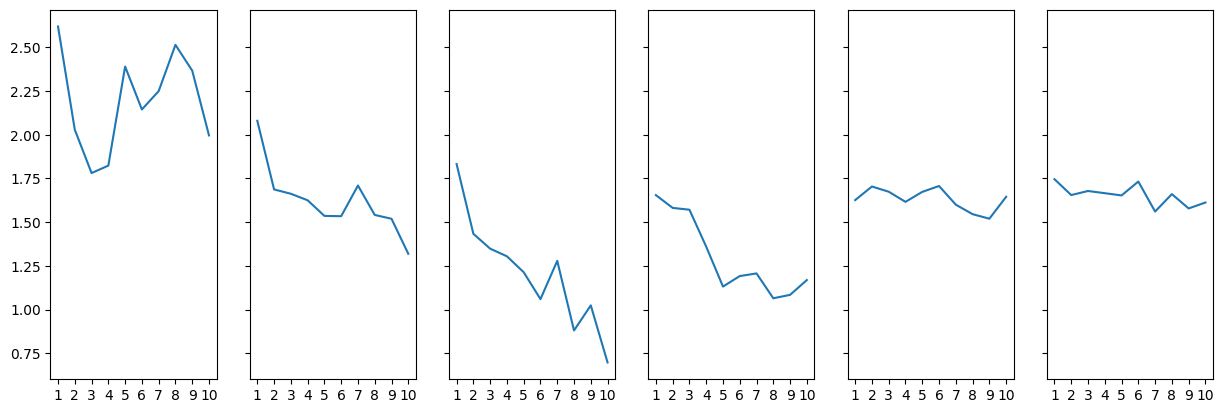

In [ ]:
plot_learning_with_loss(plot_data)

**Optimal Learning rate is 0.001 also there is zigzag pattern visible of the same learning rate which means learning rate need to reduce as model reaching at minima. So it also hint to use learning rate decay as epoch passes.**

In [ ]:
lr = 0.001

In [ ]:
exp_model_name = []

##### Final Run

In [ ]:
model_grp_name = "TransferLearning_ResNetCnn_Rnn_with_15Frame"

In [ ]:
model_path = pre_run_setup(model_grp_name)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy',
                             verbose=1, save_best_only=True, save_weights_only=True, mode='max')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001,cooldown=20)
callbacks_list = [checkpoint, reduce_lr]
# tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss')

In [ ]:
model = ResPlusRnnNet()()
model.compile(optimizer  = tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
ResNetCnn_Rnn_hist=model.fit(batched_train_ds,
          epochs = 30,
          validation_data = batched_val_ds,
          callbacks = callbacks_list)

Epoch 1/30
    111/Unknown - 23s 133ms/step - loss: 1.0372 - accuracy: 0.6048
Epoch 1: val_accuracy improved from -inf to 0.67000, saving model to ResNetCnn_Rnn_with_15Frame/2023-04-09/model-00001-1.03719-0.60483-0.74494-0.67000.ckpt
111/111 [==============================] - 29s 183ms/step - loss: 1.0372 - accuracy: 0.6048 - val_loss: 0.7449 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 2/30
111/111 [==============================] - ETA: 0s - loss: 0.3714 - accuracy: 0.8793
Epoch 2: val_accuracy improved from 0.67000 to 0.73000, saving model to ResNetCnn_Rnn_with_15Frame/2023-04-09/model-00002-0.37135-0.87934-0.84211-0.73000.ckpt
111/111 [==============================] - 16s 148ms/step - loss: 0.3714 - accuracy: 0.8793 - val_loss: 0.8421 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 3/30
111/111 [==============================] - ETA: 0s - loss: 0.1468 - accuracy: 0.9593
Epoch 3: val_accuracy did not improve from 0.73000
111/111 [==============================] - 15s 134ms/step - loss: 0.14

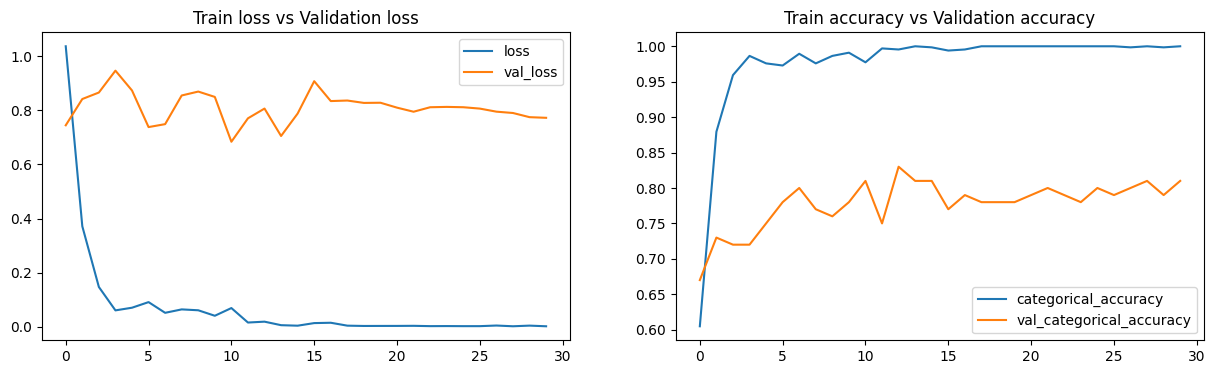

Max. Training Accuracy 1.0
Max. Validaiton Accuracy 0.8299999833106995


In [ ]:
plotModelHistory(ResNetCnn_Rnn_hist)

##### Conclustion




*   fine tuned last 8 layer of resnet 50 network.
*   found model heavily overfitting , there is a huge gap b/w traing and validation accuracy.



#### Exp-3 Basic Conv3D Model

##### Model Network

In [ ]:
# cutom layer to use cobine conv3d batchnormalization and activation
class Conv_BN_Activation(tf.keras.layers.Layer):
  def __init__(self, n_filters, kernel_size,stride=1):
    super().__init__()
    self.conv3D = layers.Conv3D(n_filters,kernel_size,stride, padding='same')
    self.bn = layers.BatchNormalization()
    self.activation = layers.Activation("relu")

  def call(self, x):
    x = self.conv3D(x) # (batch, seq, img_size)
    x = self.bn(x)
    x = self.activation(x)

    return x

# custom to have dense layer with normalization
class Dense_BN(tf.keras.layers.Layer):
  """
    Project certain dimensions of the tensor as the data is passed through different
    sized filters and downsampled.
  """
  def __init__(self, units):
    super().__init__()
    self.seq = tf.keras.Sequential([
        layers.Dense(units),
        layers.BatchNormalization()
    ])

  def call(self, x):
    return self.seq(x)


In [ ]:
# define simple conv3d network
def make_basic_conv3d_model(input_shape, n_classes,n_filters=[64,128,256,512],stride=1):
    inputs = tf.keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)

    # first block
    x = Conv_BN_Activation(64,3,stride=1)(x)
    x = layers.MaxPooling3D(2)(x)

    x = Conv_BN_Activation(128,3,stride=1)(x)
    x = layers.MaxPooling3D(2)(x)

    x = Conv_BN_Activation(256,3,stride=1)(x)
    x = layers.MaxPooling3D(2)(x)

    x = Conv_BN_Activation(512,3,stride=1)(x)

    x = layers.GlobalAveragePooling3D()(x)

    #x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(n_classes)(x)

    return tf.keras.Model(inputs, outputs)

In [ ]:
class BasicConv3dNet :
  def __init__(self,img_shape= IMG_SIZE+ (N_CHANNELS,),n_frames=N_FRAMES,n_classes=N_CLASSES) :
    self.input_shape = (n_frames,) + img_shape
    self.n_classes = n_classes

  def __call__(self) :
    return make_basic_conv3d_model(input_shape= self.input_shape,
                                   n_classes=self.n_classes)

##### Ablation Run

In [ ]:
basic_conv3d_model=BasicConv3dNet()()
basic_conv3d_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 15, 100, 100, 3)  0         
                             ]                                   
                                                                 
 rescaling_15 (Rescaling)    (None, 15, 100, 100, 3)   0         
                                                                 
 conv_bn__activation_4 (Conv  (None, 15, 100, 100, 64)  5504     
 _BN_Activation)                                                 
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 7, 50, 50, 64)    0         
 3D)                                                             
                                                                 
 conv_bn__activation_5 (Conv  (None, 7, 50, 50, 128)   221824    
 _BN_Activation)                                           

In [ ]:
# batch data set
# taken small dataset for testing of network functionalily running good
tr_ds = batched_train_ds.take(5)
vl_ds = batched_val_ds.take(5)

In [ ]:
basic_conv3d_model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

basic_conv3d_model.fit(tr_ds,
          epochs = 10,
          validation_data = vl_ds,
          callbacks = tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'))

Epoch 1/10
5/5 [==============================] - 7s 259ms/step - loss: 2.2906 - accuracy: 0.2667 - val_loss: 4.3599 - val_accuracy: 0.1000
Epoch 2/10
5/5 [==============================] - 1s 172ms/step - loss: 1.8351 - accuracy: 0.2667 - val_loss: 30.3547 - val_accuracy: 0.1667
Epoch 3/10
5/5 [==============================] - 1s 172ms/step - loss: 1.4667 - accuracy: 0.3000 - val_loss: 29.5239 - val_accuracy: 0.2000


##### Learning Rate Tuning :

In [ ]:
# instantiate a LossHistory() object to store histories
basic_conv3d_model = BasicConv3dNet()
plot_data = learning_rate_tuning(basic_conv3d_model,tr_ds,vl_ds,hyper_lr=[0.1, 0.01, 0.001,0.0001,0.00001,1e-6])



========================================   Checking for LR=0.1  ========================================
Epoch 1/10
5/5 [==============================] - 5s 245ms/step - loss: 15.3544 - accuracy: 0.1667 - val_loss: 539142.1250 - val_accuracy: 0.2000
Epoch 2/10
5/5 [==============================] - 1s 171ms/step - loss: 5.6986 - accuracy: 0.2667 - val_loss: 45291.9297 - val_accuracy: 0.2333
Epoch 3/10
5/5 [==============================] - 1s 168ms/step - loss: 1.9632 - accuracy: 0.1667 - val_loss: 7911.8740 - val_accuracy: 0.2333
Epoch 4/10
5/5 [==============================] - 1s 173ms/step - loss: 1.5780 - accuracy: 0.3667 - val_loss: 4669.0649 - val_accuracy: 0.2000
Epoch 5/10
5/5 [==============================] - 1s 170ms/step - loss: 1.6107 - accuracy: 0.2333 - val_loss: 5026.6187 - val_accuracy: 0.3000
Epoch 6/10
5/5 [==============================] - 1s 196ms/step - loss: 1.6782 - accuracy: 0.1667 - val_loss: 5505.3213 - val_accuracy: 0.1667
Epoch 7/10
5/5 [===============

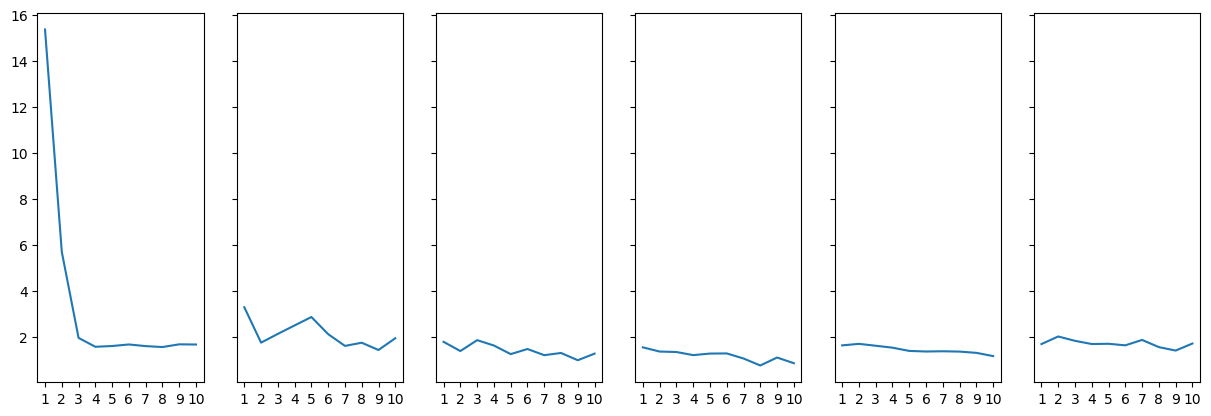

In [ ]:
plot_learning_with_loss(plot_data)

**Optimal Learning rate is 0.0001 also there is zigzag pattern visible of the same learning rate which means learning rate need to reduce as model reaching at minima. So it also hint to use learning rate decay as epoch passes.**

In [ ]:
lr = 0.0001

In [ ]:
exp_model_name = []

##### Final Run

In [ ]:
model_grp_name = "Basic_Conv3D_15_Frames"

In [ ]:
model_path = pre_run_setup(model_grp_name)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy',
                             verbose=1, save_best_only=True, save_weights_only=True, mode='max')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.000001,cooldown=20)
callbacks_list = [checkpoint, reduce_lr]
# tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss')

In [ ]:
basic_conv3d_model = BasicConv3dNet()()
basic_conv3d_model.compile(optimizer  = tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
basic_conv3d_model_hist=basic_conv3d_model.fit(batched_train_ds,
          epochs = 30,
          validation_data = batched_val_ds,
          callbacks = callbacks_list)

Epoch 1/30
    111/Unknown - 17s 125ms/step - loss: 1.1162 - accuracy: 0.5520
Epoch 1: val_accuracy improved from -inf to 0.21000, saving model to Basic_Conv3D_15_Frames/2023-04-09/model-00001-1.11624-0.55204-3.68955-0.21000.ckpt
111/111 [==============================] - 19s 140ms/step - loss: 1.1162 - accuracy: 0.5520 - val_loss: 3.6896 - val_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 2/30
111/111 [==============================] - ETA: 0s - loss: 0.7454 - accuracy: 0.7195
Epoch 2: val_accuracy did not improve from 0.21000
111/111 [==============================] - 14s 126ms/step - loss: 0.7454 - accuracy: 0.7195 - val_loss: 5.1791 - val_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 3/30
111/111 [==============================] - ETA: 0s - loss: 0.6099 - accuracy: 0.7858
Epoch 3: val_accuracy did not improve from 0.21000
111/111 [==============================] - 15s 133ms/step - loss: 0.6099 - accuracy: 0.7858 - val_loss: 5.0220 - val_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 4/30
111/111 [===

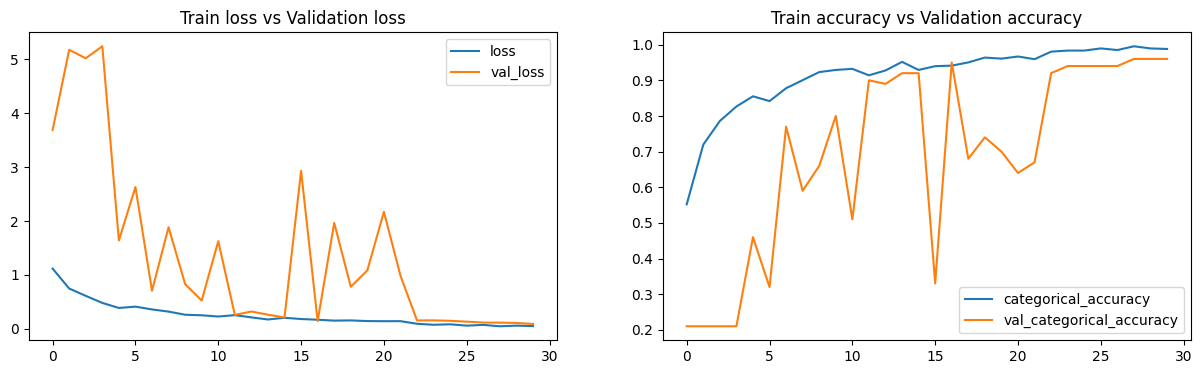

Max. Training Accuracy 0.9954751133918762
Max. Validaiton Accuracy 0.9599999785423279


In [ ]:
plotModelHistory(basic_conv3d_model_hist)

##### Conclusion :



*   OMG, Validation accuracy and validation loss are showing zig-zag pattern
*   There is a huge gap b/w Up and down of zigzag
*   But after 25 epoch , model is getting stable and both training score and validation score are close to each other.


#### Exp-4 Conv3D_Plus_ResNetBlock

##### Model Network

In [ ]:
def add_residual_block(input, filters, kernel_size):
  """
    Add residual blocks to the model. If the last dimensions of the input data
    and filter size does not match, project it such that last dimension matches.
  """
  out = Conv_BN_Activation(filters,kernel_size,stride=1)(input)

  res = input
  # Using the Keras functional APIs, project the last dimension of the tensor to
  # match the new filter size
  if out.shape[-1] != input.shape[-1]:
    res = Dense_BN(out.shape[-1])(res)

  return layers.add([res, out])

In [ ]:
def make_conv3d_with_resnet_model(input_shape, n_classes,n_filters=[64,128,256,512],stride=1):
    inputs = tf.keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)

    # first block
    x = add_residual_block(x,64,3)
    x = layers.MaxPooling3D(2)(x)

    x = add_residual_block(x,128,3)
    x = layers.MaxPooling3D(2)(x)

    x = add_residual_block(x,256,3)
    x = layers.MaxPooling3D(2)(x)

    x = Conv_BN_Activation(512,3,stride=1)(x)

    x = layers.GlobalAveragePooling3D()(x)

    #x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(n_classes)(x)

    return tf.keras.Model(inputs, outputs)

In [ ]:
class ResNetConv3dNet :
  def __init__(self,img_shape= IMG_SIZE+ (N_CHANNELS,),n_frames=N_FRAMES,n_classes=N_CLASSES) :
    self.input_shape = (n_frames,) + img_shape
    self.n_classes = n_classes

  def __call__(self) :
    return make_conv3d_with_resnet_model(input_shape= self.input_shape,
                                   n_classes=self.n_classes)

In [ ]:
resnetConv3d_net = ResNetConv3dNet()()
resnetConv3d_net.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 15, 100, 10  0           []                               
                                0, 3)]                                                            
                                                                                                  
 rescaling_23 (Rescaling)       (None, 15, 100, 100  0           ['input_24[0][0]']               
                                , 3)                                                              
                                                                                                  
 dense_bn (Dense_BN)            (None, 15, 100, 100  512         ['rescaling_23[0][0]']           
                                , 64)                                                       

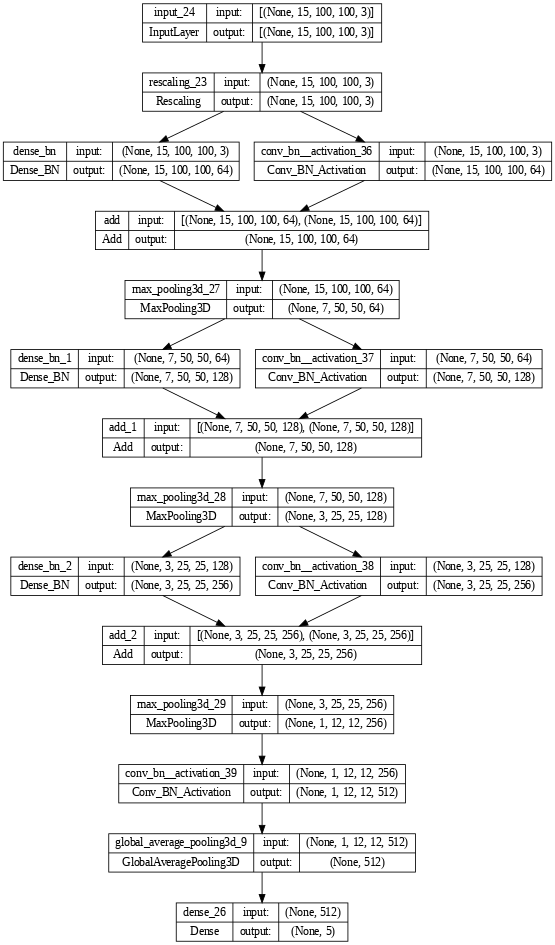

In [ ]:
tf.keras.utils.plot_model(resnetConv3d_net, expand_nested=True, dpi=60, show_shapes=True)

##### Ablation Run

In [ ]:
resnetConv3d_net=ResNetConv3dNet()()

In [ ]:
# batch data set
# taken batch size 3 for testing of network functionalily running good
tr_ds = batched_train_ds.take(5)
vl_ds = batched_val_ds.take(5)

In [ ]:
resnetConv3d_net.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

resnetConv3d_net.fit(tr_ds,
          epochs = 10,
          validation_data = vl_ds,
          callbacks = tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'))

Epoch 1/10
5/5 [==============================] - 8s 335ms/step - loss: 1.8777 - accuracy: 0.2667 - val_loss: 12.5609 - val_accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 1s 227ms/step - loss: 1.9116 - accuracy: 0.3667 - val_loss: 24.2344 - val_accuracy: 0.1667
Epoch 3/10
5/5 [==============================] - 1s 228ms/step - loss: 1.2169 - accuracy: 0.5667 - val_loss: 24.9122 - val_accuracy: 0.1667


##### Learning Rate Tuning :

In [ ]:
# instantiate a LossHistory() object to store histories
resnetConv3d_net = ResNetConv3dNet()
plot_data = learning_rate_tuning(resnetConv3d_net,tr_ds,vl_ds,hyper_lr=[0.1, 0.01, 0.001,0.0001,0.00001,1e-6])



========================================   Checking for LR=0.1  ========================================
Epoch 1/10
5/5 [==============================] - 11s 326ms/step - loss: 18.2827 - accuracy: 0.0667 - val_loss: 35181.1055 - val_accuracy: 0.2333
Epoch 2/10
5/5 [==============================] - 1s 227ms/step - loss: 4.5712 - accuracy: 0.1333 - val_loss: 5183.0098 - val_accuracy: 0.3667
Epoch 3/10
5/5 [==============================] - 1s 227ms/step - loss: 1.7730 - accuracy: 0.2000 - val_loss: 1808.5072 - val_accuracy: 0.2667
Epoch 4/10
5/5 [==============================] - 1s 233ms/step - loss: 1.6385 - accuracy: 0.2000 - val_loss: 1729.4408 - val_accuracy: 0.3000
Epoch 5/10
5/5 [==============================] - 1s 314ms/step - loss: 1.6699 - accuracy: 0.1667 - val_loss: 1299.0028 - val_accuracy: 0.3000
Epoch 6/10
5/5 [==============================] - 1s 226ms/step - loss: 1.6363 - accuracy: 0.1333 - val_loss: 1020.2220 - val_accuracy: 0.2667
Epoch 7/10
5/5 [================

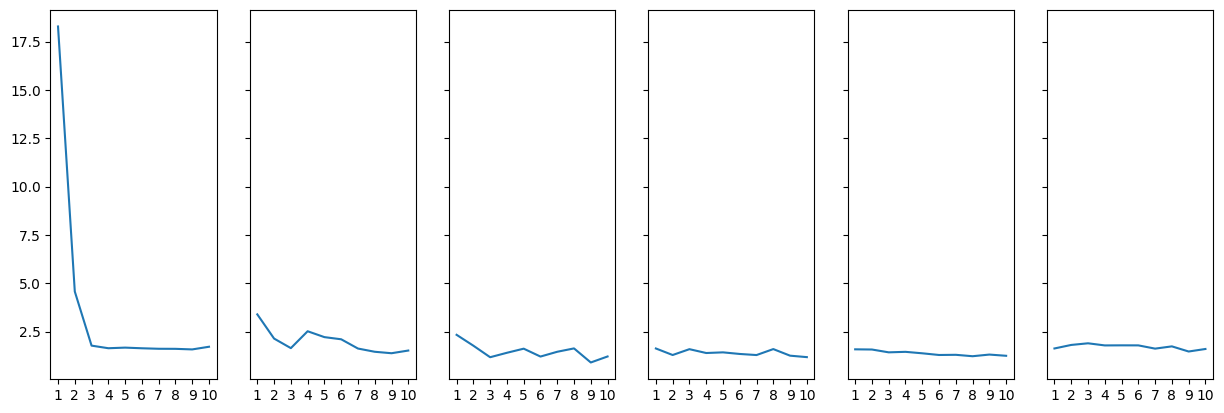

In [ ]:
plot_learning_with_loss(plot_data)

**Optimal Learning rate is 0.00001 But not zig-sag pattern.**

In [ ]:
lr = 0.00001

In [ ]:
exp_model_name = []

##### Final Run

In [ ]:
model_grp_name = "ResNetBlock_Conv3D_15_Frames"

In [ ]:
model_path = pre_run_setup(model_grp_name)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy',
                             verbose=1, save_best_only=True, save_weights_only=True, mode='max')

callbacks_list = [checkpoint]
# tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss')

In [ ]:
resnetConv3d_net = ResNetConv3dNet()()
resnetConv3d_net.compile(optimizer  = tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
resnetConv3d_net_hist=resnetConv3d_net.fit(batched_train_ds,
          epochs = 30,
          validation_data = batched_val_ds,
          callbacks = callbacks_list)

Epoch 1/30
    111/Unknown - 23s 153ms/step - loss: 1.4054 - accuracy: 0.3952
Epoch 1: val_accuracy improved from -inf to 0.21000, saving model to ResNetBlock_Conv3D_15_Frames/2023-04-09/model-00001-1.40538-0.39517-2.43321-0.21000.ckpt
111/111 [==============================] - 25s 173ms/step - loss: 1.4054 - accuracy: 0.3952 - val_loss: 2.4332 - val_accuracy: 0.2100
Epoch 2/30
111/111 [==============================] - ETA: 0s - loss: 1.1769 - accuracy: 0.5098
Epoch 2: val_accuracy did not improve from 0.21000
111/111 [==============================] - 18s 165ms/step - loss: 1.1769 - accuracy: 0.5098 - val_loss: 3.8316 - val_accuracy: 0.2100
Epoch 3/30
111/111 [==============================] - ETA: 0s - loss: 1.0263 - accuracy: 0.6078
Epoch 3: val_accuracy did not improve from 0.21000
111/111 [==============================] - 18s 164ms/step - loss: 1.0263 - accuracy: 0.6078 - val_loss: 4.1375 - val_accuracy: 0.2100
Epoch 4/30
111/111 [==============================] - ETA: 0s - loss

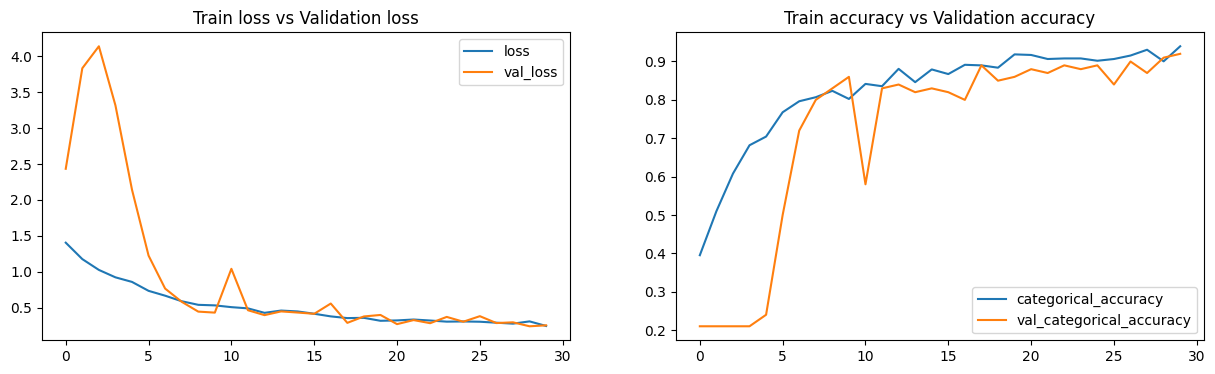

Max. Training Accuracy 0.9396681785583496
Max. Validaiton Accuracy 0.9200000166893005


In [ ]:
plotModelHistory(resnetConv3d_net_hist)

##### Conclustion :



*   used resnet skip connection to reduce vanishing gradient problem.
*   This architecture looks more promising and stable.
*   After few epoch , both validation accuracy and training accuracy are following each other.



##### Image Augmentation Experiment :

In [ ]:
img_aug = tf.keras.Sequential([
  layers.RandomZoom(0.3),
  layers.RandomBrightness(0.2),
  layers.RandomContrast(0.2),
  layers.RandomTranslation(height_factor=0.2,width_factor=0.2)
])

In [ ]:
def to_gif(images,fps):
  converted_images = tf.cast(images, tf.uint8)
  imageio.mimsave('./animation.gif', converted_images.numpy(), fps=fps)
  return embed.embed_file('./animation.gif')

In [ ]:
# initiating augmentation pipeline
aug_train_ds = train_ds.map(lambda x, y: (img_aug(x), y)).prefetch(buffer_size=AUTOTUNE)


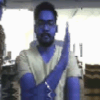

In [ ]:
gif,label=next(iter(aug_train_ds))
to_gif(gif,N_FRAMES)


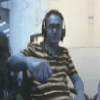

In [ ]:
gif,label=next(iter(aug_train_ds))
to_gif(gif,N_FRAMES)

In [ ]:
aug_train_ds = aug_train_ds.batch(BATCH_SIZE)

In [ ]:
model_grp_name = "ResNetBlock_Conv3D_15_Frames_with_Augmentation"

In [ ]:
model_path = pre_run_setup(model_grp_name)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy',
                             verbose=1, save_best_only=True, save_weights_only=True, mode='max')

callbacks_list = [checkpoint]
# tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss')

In [ ]:
resnetConv3d_net_aug = ResNetConv3dNet()()
# load pre trained model
path = "/content/drive/MyDrive/AI_ML_CLass/Data/Gesture-Recognisation-System/Project_data/ResNetBlock_Conv3D_15_Frames/2023-04-09"
path = path+"/model-00030-0.24671-0.93967-0.25539-0.92000.ckpt"
resnetConv3d_net_aug.load_weights(path)
resnetConv3d_net_aug.compile(optimizer  = tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
resnetConv3d_net_aug_hist=resnetConv3d_net_aug.fit(aug_train_ds,
          epochs = 30,
          validation_data = batched_val_ds,
          callbacks = callbacks_list)

Epoch 1/30
    111/Unknown - 1298s 12s/step - loss: 1.5328 - accuracy: 0.4465
Epoch 1: val_accuracy improved from -inf to 0.67000, saving model to ResNetBlock_Conv3D_15_Frames_with_Augmentation/2023-04-09/model-00001-1.53278-0.44646-1.34251-0.67000.ckpt
111/111 [==============================] - 1299s 12s/step - loss: 1.5328 - accuracy: 0.4465 - val_loss: 1.3425 - val_accuracy: 0.6700
Epoch 2/30
111/111 [==============================] - ETA: 0s - loss: 1.1488 - accuracy: 0.5475
Epoch 2: val_accuracy did not improve from 0.67000
111/111 [==============================] - 673s 6s/step - loss: 1.1488 - accuracy: 0.5475 - val_loss: 2.8479 - val_accuracy: 0.3300
Epoch 3/30
111/111 [==============================] - ETA: 0s - loss: 1.1001 - accuracy: 0.5566
Epoch 3: val_accuracy did not improve from 0.67000
111/111 [==============================] - 362s 3s/step - loss: 1.1001 - accuracy: 0.5566 - val_loss: 1.1413 - val_accuracy: 0.6100
Epoch 4/30
111/111 [==============================] - 

##### Conclustion :

 * Here,Augmentation is bad, may be augmentation is different for each sequence of image in frame, which it distorting video sequecne.



##### Experiment with Gray Image

In [ ]:
gray_train=train_ds.map(lambda x, y: (tfio.experimental.color.rgb_to_grayscale(x), y)).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
gray_val=val_ds.map(lambda x, y: (tfio.experimental.color.rgb_to_grayscale(x), y)).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

In [ ]:
model_grp_name = "ResNetBlock_Conv3D_15_Frames_with_Gray"

In [ ]:
model_path = pre_run_setup(model_grp_name)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy',
                             verbose=1, save_best_only=True, save_weights_only=True, mode='max')

callbacks_list = [checkpoint]
# tf.keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss')

In [ ]:
resnetConv3d_net_gray = ResNetConv3dNet(img_shape= IMG_SIZE+ (1,))()
resnetConv3d_net_gray.compile(optimizer  = tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
resnetConv3d_net_gray_hist=resnetConv3d_net_gray.fit(gray_train,
          epochs = 30,
          validation_data = gray_val,
          callbacks = callbacks_list)

Epoch 1/30
    111/Unknown - 1116s 10s/step - loss: 1.2944 - accuracy: 0.4163
Epoch 1: val_accuracy improved from -inf to 0.21000, saving model to ResNetBlock_Conv3D_15_Frames_with_Gray/2023-04-09/model-00001-1.29436-0.41629-2.53334-0.21000.ckpt
111/111 [==============================] - 1319s 12s/step - loss: 1.2944 - accuracy: 0.4163 - val_loss: 2.5333 - val_accuracy: 0.2100
Epoch 2/30
111/111 [==============================] - ETA: 0s - loss: 1.1360 - accuracy: 0.5535
Epoch 2: val_accuracy did not improve from 0.21000
111/111 [==============================] - 636s 6s/step - loss: 1.1360 - accuracy: 0.5535 - val_loss: 3.6533 - val_accuracy: 0.2100
Epoch 3/30
111/111 [==============================] - ETA: 0s - loss: 1.0230 - accuracy: 0.5973
Epoch 3: val_accuracy did not improve from 0.21000
111/111 [==============================] - 363s 3s/step - loss: 1.0230 - accuracy: 0.5973 - val_loss: 3.9260 - val_accuracy: 0.2100
Epoch 4/30
111/111 [==============================] - ETA: 0s 

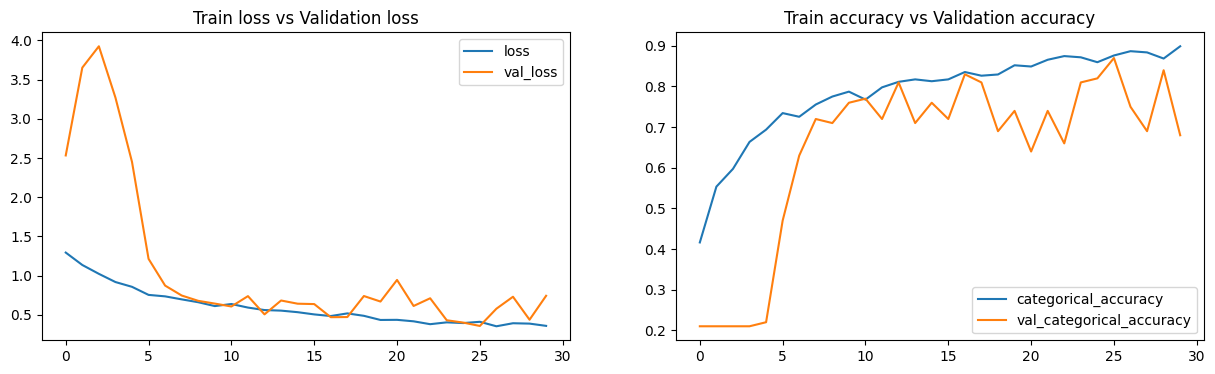

Max. Training Accuracy 0.8989441990852356
Max. Validaiton Accuracy 0.8700000047683716


In [ ]:
plotModelHistory(resnetConv3d_net_gray_hist)

### Final Conclusion & Summary

In [ ]:
# experiment matrix
experiment_folder = [
                     "SimpleCnn_Plus_Rnn_with_15Frame",
                     "TransferLearning_ResNetCnn_Rnn_with_15Frame",
                     "Basic_Conv3D_15_Frames",
                     "ResNetBlock_Conv3D_15_Frames",
                     "ResNetBlock_Conv3D_15_Frames_with_Augmentation",
                     "ResNetBlock_Conv3D_15_Frames_with_Gray"
                     ]
val_accuracy = [
    93.00,100,99.49,93.96,74,89.89
]

train_accuracy = [
    98.49,83,96,92,71,87
]

model_comments = [
    "ZigZag pattern is visible for validation accuracy"
]



pd.DataFrame(list(zip(experiment_folder,val_accuracy,train_accuracy)),columns=["experiment","val_acc","train_acc"])\
.head()

,experiment,val_acc,train_acc
0,SimpleCnn_Plus_Rnn_with_15Frame,93.00,98.49
1,TransferLearning_ResNetCnn_Rnn_with_15Frame,100.00,83.00
2,Basic_Conv3D_15_Frames,99.49,96.00
3,ResNetBlock_Conv3D_15_Frames,93.96,92.00
4,ResNetBlock_Conv3D_15_Frames_with_Augmentation,74.00,71.00




1.   Every model is trained for 30 Epoch and first found out best learning rate for each model architecture then using plot we found out that Learning Rate decay is needed or not. Few of curv showed zigzig for lower learning rate. It means as model is near to minima, learning rate needed to reduce.
2.   Best Validation Accuracy is 96 which is from ResNetBlock_Conv3D_15_Frames. I have made resnet block which remove problem of gradient vanish. Also val_acc and train_acc remain together.
3.   Validation accuracy and training accuracy follows together in Simple Cnn Plus Rnn as per curv of model history.
4.   validation accuracy of Other than Simple Cnn Plus Rnn and ResNetBlock_Conv3D_15_Frames followed zigzag curv.
5.  I also noticed choosing such network which contain number of high parameter , is more tends to overfit. So I tried to Keep simple as possible.
6. For example Transfer learning showed overfit trends.
7. Augmentation did not work in this problem. May be because after apply augmentation is distorting image sequence which is creating confusion.
8. May be different Augementation of on each image of single frame is not right approach.

